<a href="https://colab.research.google.com/github/alistair0111/TensorFlow-In-Practice/blob/master/Natural%20Language%20Processing%20in%20TensorFlow/Course_3_Week_3_Lesson_1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Single Layer LSTM

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.2.0


In [3]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [0]:
tokenizer = info.features['text'].encoder

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 978s 3s/step - loss: 0.5455 - accuracy: 0.7253 - val_loss: 0.4426 - val_accuracy: 0.8053
Epoch 2/10
391/391 [==============================] - 1026s 3s/step - loss: 0.3599 - accuracy: 0.8524 - val_loss: 0.4247 - val_accuracy: 0.8167
Epoch 3/10
391/391 [==============================] - 1018s 3s/step - loss: 0.2782 - accuracy: 0.8924 - val_loss: 0.3858 - val_accuracy: 0.8376
Epoch 4/10
391/391 [==============================] - 1028s 3s/step - loss: 0.2265 - accuracy: 0.9136 - val_loss: 0.4015 - val_accuracy: 0.8447
Epoch 5/10
391/391 [==============================] - 1026s 3s/step - loss: 0.3402 - accuracy: 0.8492 - val_loss: 0.5942 - val_accuracy: 0.7953
Epoch 6/10
391/391 [==============================] - 1038s 3s/step - loss: 0.6248 - accuracy: 0.6592 - val_loss: 0.6287 - val_accuracy: 0.6904
Epoch 7/10
391/391 [==============================] - 1021s 3s/step - loss: 0.2994 - accuracy: 0.8802 - val_loss: 0.4015 - val_accuracy: 

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

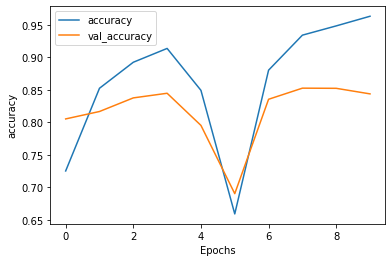

In [12]:
plot_graphs(history, 'accuracy')

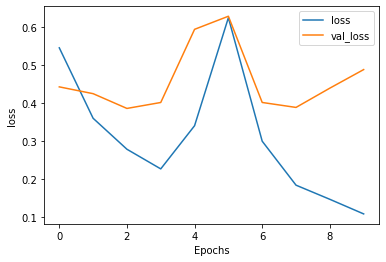

In [13]:
plot_graphs(history, 'loss')